In [1]:
import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE

## 讀取檔案

In [2]:
train = pd.read_csv('./data/train.csv')

print(f'train: {train.shape}')

train: (1095, 81)


## 取出連續型特徵 (方便降維)

In [3]:
discrepte = [f for f in train.columns if train.dtypes[f] == 'object']

train = train.drop(columns = discrepte, axis=1)
train = train.drop(columns = 'Id', axis=1)
train = train.drop(columns = 'SalePrice', axis=1)

print(f'train_continual: {train.shape}')

train_continual: (1095, 36)


## 分析缺失值

missing feature: 3


<function matplotlib.pyplot.show(close=None, block=None)>

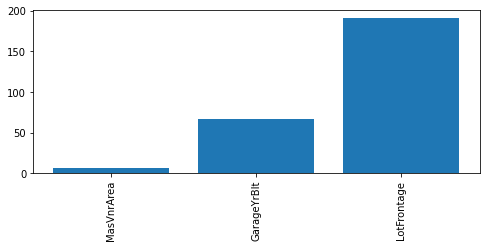

In [4]:
""" Your code hear: 練習印出缺失值圖表 """
missing = train.isnull().sum(axis=0)
missing = missing[missing > 0]
print(f'missing feature: {len(missing)}')

missing.sort_values(inplace=True)

plt.figure(figsize=(8, 3))
plt.bar(missing.index, missing.values)
plt.xticks(rotation='vertical')
plt.show

## 去除缺失值

In [5]:
""" Your code hear: 去除缺失值 """
print(f'before delete: {train.shape}')

delete_missing = train.drop(columns = missing.index, axis=1)

print(f'after delete: {delete_missing.shape}')

before delete: (1095, 36)
after delete: (1095, 33)


## 轉化成 ndarray 後進行標準化，並將 Y 透過四分位數轉換成四個類別

In [6]:
data = delete_missing.values

Max = np.max(data, axis=0)
Min = np.min(data, axis=0)
Range = Max - Min

Norms = (data - Min) / Range

Norms_cat = Norms
Norms_cat[Norms_cat < 0.25] = 1
Norms_cat[Norms_cat < 0.5] = 2
Norms_cat[Norms_cat < 0.75] = 3
Norms_cat[Norms_cat < 1] = 4

print(Norms_cat)

[[1. 1. 2. ... 1. 3. 1.]
 [1. 1. 4. ... 1. 2. 4.]
 [3. 1. 4. ... 1. 3. 2.]
 ...
 [1. 1. 3. ... 1. 3. 1.]
 [1. 1. 4. ... 1. 3. 4.]
 [1. 1. 2. ... 1. 3. 2.]]


## 利用 TSNE 降維

In [7]:
tsne = TSNE(
    n_components=2, init='pca', perplexity = 40, 
    early_exaggeration = 8, learning_rate = 150,
    n_iter = 2000
)
#X_tsne = tsne.fit_transform(X)

X_tsne = tsne.fit_transform(Norms_cat)

print(X_tsne)

[[ 19.32792    25.861555 ]
 [ 23.787998   15.949007 ]
 [ 15.702452  -17.102877 ]
 ...
 [  0.5922543 -34.662148 ]
 [  6.3229556 -28.464787 ]
 [-11.324441  -21.317806 ]]


## 做圖

<function matplotlib.pyplot.show(close=None, block=None)>

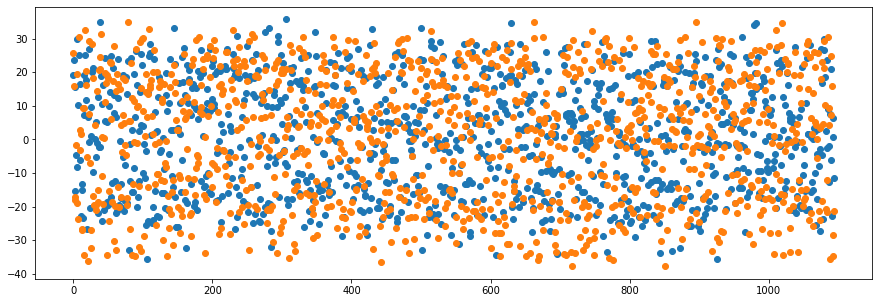

In [8]:
plt.figure(figsize=(15, 5))

plt.plot(X_tsne[:,0], 'o')
plt.plot(X_tsne[:,1], 'o')

plt.show

## 1. 請問同學從降維後的圖表中可以看出什麼現象？

點大部分散亂在y軸 -30~30

## 2. 請同學分析，什麼因素導致降維後的點座標重合性高？

1.標準化
2.降維後，各feature的值被綜合起來，值會變得較接近